In [1]:
import numpy as np
import os
os.environ["DDEBACKEND"] = "pytorch"
import deepxde as dde
import matplotlib.pyplot as plt

%matplotlib inline

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
data_dir = "../data/deeponet_antiderivative_unaligned/"

d = np.load(data_dir + "antiderivative_unaligned_train.npz", allow_pickle=True)
X_train = (d["X_train0"].astype(np.float32), d["X_train1"].astype(np.float32))
y_train = d["y_train"].astype(np.float32)
d = np.load(data_dir + "antiderivative_unaligned_test.npz", allow_pickle=True)
X_test = (d["X_test0"].astype(np.float32), d["X_test1"].astype(np.float32))
y_test = d["y_test"].astype(np.float32)

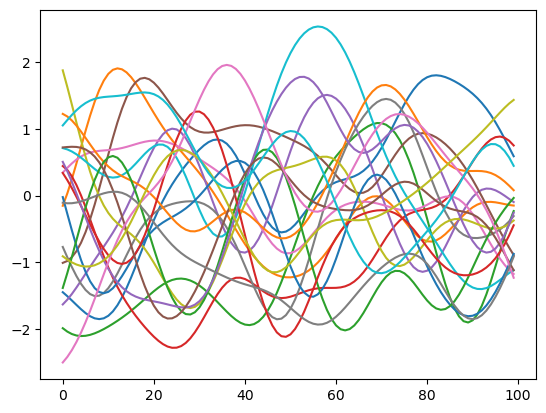

In [4]:
plt.plot(X_train[0][0:20, :].T)

In [5]:
X_train[0].shape, X_train[1].shape

((10000, 100), (10000, 1))

In [6]:
X_test[0].shape, X_test[1].shape

((100000, 100), (100000, 1))

In [7]:
y_train.shape, y_test.shape

((10000, 1), (100000, 1))

In [8]:
data = dde.data.Triple(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [9]:
m = 100  # input dim
dim_x = 1  # probe/sensor dim
net = dde.nn.DeepONet(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

In [10]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

Compiling model...
'compile' took 0.000438 s



In [11]:
loss_history, train_state = model.train(iterations=1000)

Training model...

Step      Train loss    Test loss     Test metric
0         [2.11e-01]    [2.11e-01]    []  
1000      [3.97e-04]    [4.35e-04]    []  

Best model at step 1000:
  train loss: 3.97e-04
  test loss: 4.35e-04
  test metric: []

'train' took 9.124365 s



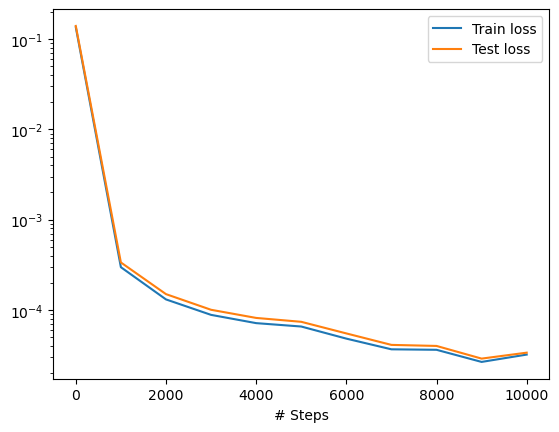

In [36]:
dde.utils.plot_loss_history(loss_history)
plt.show()